<a href="https://colab.research.google.com/github/Irene32Mwaniki/Irene32Mwaniki/blob/main/Economic_Analysis_with_Python(Pandas_%26_Numpy)_%26_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Goal of the Project**

> To analyze and compare the economic performance of selected U.S. states by leveraging key economic indicators retrieved via the FRED API, with the aim of identifying trends, disparities, and factors influencing regional economic health.



# **Install API**

### **> /dev/null (hides the entire output - too long)**

In [ ]:
!pip install fredapi > /dev/null

# **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.style.use('fivethirtyeight')
pd.set_option("display.max_columns", 500)
color_pal =plt.rcParams['axes.prop_cycle'].by_key()['color']

import warnings
warnings.filterwarnings('ignore')

from fredapi import Fred
fred_key = 'f3b836477bbfb15b4370614e8dcf8861'



# **Create FRED API object**

In [ ]:
fred = Fred(api_key=fred_key)

# **Search for Economic Data from FRED Database**

In [ ]:
sp_search = fred.search('S&P', order_by='popularity')

In [ ]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-11-24,2024-11-24,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-11-21,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-11-22 10:51:14-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-11-24,2024-11-24,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-10-29 08:11:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-11-24,2024-11-24,S&P 500,2014-11-24,2024-11-22,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-11-22 19:11:30-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-11-24,2024-11-24,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-11-21,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-11-22 10:51:16-06:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2024-11-24,2024-11-24,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2024-11-21,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-11-22 10:57:07-06:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...


# **Pull Raw Data & Plot**

<Axes: title={'center': 'S&P 500'}>

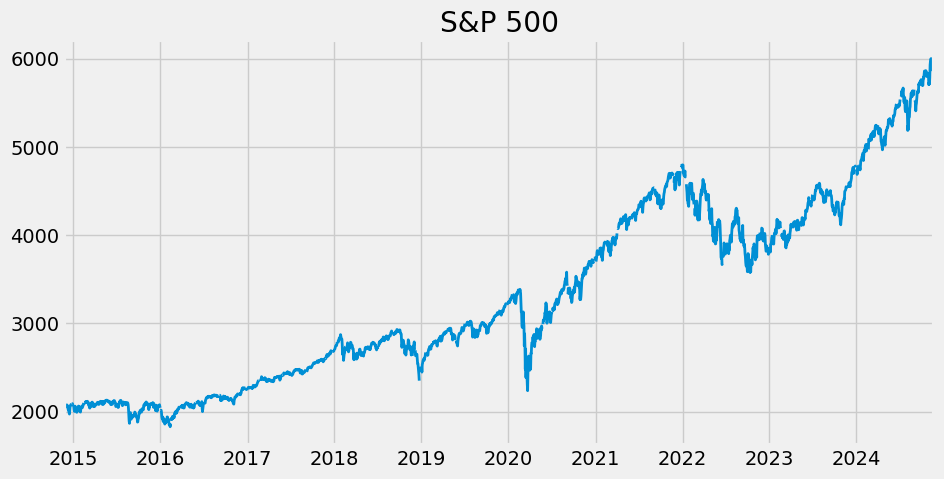

In [ ]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

# **Pull and Join Multiple Data Series**

## **Unemployment Data from Database**





In [ ]:
unemp_results = fred.search('unemployment')
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-11-24,2024-11-24,Unemployment Rate,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-11-24,2024-11-24,Unemployment Rate,1948-01-01,2024-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-11-01 07:46:03-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-11-24,2024-11-24,Unemployment Level,1948-01-01,2024-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-11-01 07:47:06-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-11-24,2024-11-24,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-11-24,2024-11-24,Continued Claims (Insured Unemployment),1967-01-07,2024-11-09,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-11-21 07:33:04-06:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN340030000000003A,LAUCN340030000000003A,2024-11-24,2024-11-24,"Unemployment Rate in Bergen County, NJ",1990-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-01 10:48:38-05:00,0,These data come from the Current Population Su...
LMUNRRTTLUM156S,LMUNRRTTLUM156S,2024-11-24,2024-11-24,Infra-Annual Registered Unemployment and Job V...,1995-01-01,2023-12-01,Monthly,M,Growth rate previous period,Growth rate previous period,Seasonally Adjusted,SA,2024-04-10 11:07:38-05:00,5,OECD Data Filters: REF_AREA: LUX MEASURE: REG...
LNS14000315,LNS14000315,2024-11-24,2024-11-24,Unemployment Rate - Married Women,1955-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:30-05:00,9,To obtain estimates of women worker employment...


<Axes: title={'center': 'Unemployment Rates'}>

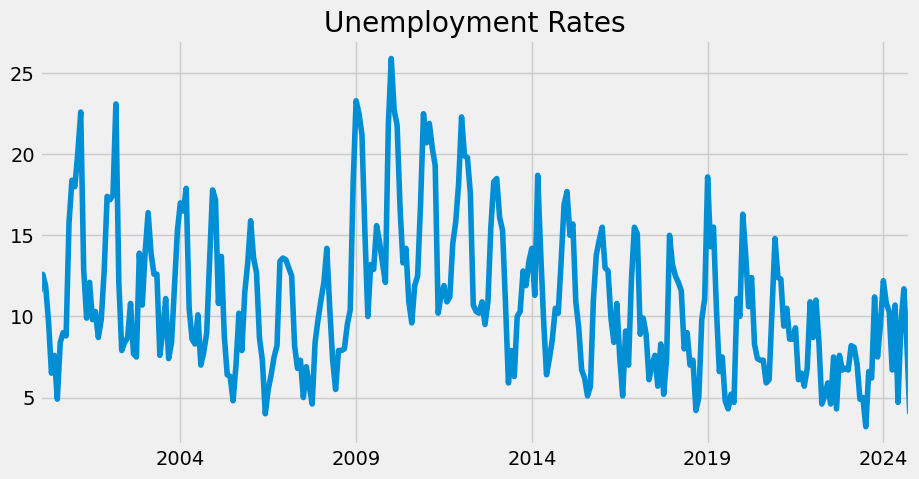

In [ ]:
unrate = fred.get_series('LNU04032223')
unrate
unrate.plot(figsize=(10, 5), title='Unemployment Rates', lw=4)

## **Pull Unemployment Rates for Specific State**

In [ ]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment ==  "Seasonally Adjusted" and units == "Percent" ')
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-11-24,2024-11-24,Unemployment Rate,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:02-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-11-24,2024-11-24,Unemployment Rate - Black or African American,1972-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:04-05:00,72,The series comes from the 'Current Population ...
U6RATE,U6RATE,2024-11-24,2024-11-24,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:08-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2024-11-24,2024-11-24,Unemployment Rate in California,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:02-06:00,64,None
TXUR,TXUR,2024-11-24,2024-11-24,Unemployment Rate in Texas,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:49:03-06:00,56,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M08311USM156SNBR,M08311USM156SNBR,2024-11-24,2024-11-24,"Unemployment Rate, Married Males, Spouse Prese...",1954-11-01,1968-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:28:17-05:00,6,Beginning In 1960 Data Include Alaska And Hawa...
LNS13008397,LNS13008397,2024-11-24,2024-11-24,"Of Total Unemployed, Percent Unemployed Less T...",1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:36-05:00,6,The series comes from the 'Current Population ...
LBSSA20,LBSSA20,2024-11-24,2024-11-24,Labor Force Participation Rate for Kansas,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-19 09:01:15-06:00,6,A state's labor-force participation rate is th...


In [ ]:

unemp_df.index

Index(['UNRATE', 'LNS14000006', 'U6RATE', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR',
       ...
       'LNS14000048', 'LBSSA09', 'LBSSA38', 'LBSSA46', 'LNS14000089',
       'M08311USM156SNBR', 'LNS13008397', 'LBSSA20', 'LNS14000150',
       'NEIPTERM156SFRBRIC'],
      dtype='object', name='series id', length=158)

In [ ]:
all_results = []

for myid in unemp_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name=myid)
  all_results.append(results)




In [ ]:
unemp_df.index.tolist()

['UNRATE',
 'LNS14000006',
 'U6RATE',
 'CAUR',
 'TXUR',
 'M0892AUSM156SNBR',
 'LNS14000024',
 'LNS14000031',
 'M0892BUSM156SNBR',
 'NYUR',
 'U2RATE',
 'FLUR',
 'LNS14000002',
 'LNS14000009',
 'LNS14000003',
 'PAUR',
 'OHUR',
 'U4RATE',
 'LNS14000001',
 'LNS14027660',
 'MIUR',
 'LNS14027662',
 'ALUR',
 'LNS14024887',
 'MAUR',
 'NCUR',
 'ILUR',
 'NJUR',
 'GAUR',
 'COUR',
 'U1RATE',
 'AZUR',
 'WIUR',
 'VAUR',
 'KYUR',
 'U5RATE',
 'LRUN64TTUSM156S',
 'SCUR',
 'NMUR',
 'MNUR',
 'LBSSA06',
 'TNUR',
 'LNS14032183',
 'LNS14000012',
 'WAUR',
 'LNS14027659',
 'MDUR',
 'ORUR',
 'WVUR',
 'NVUR',
 'ARUR',
 'OKUR',
 'MOUR',
 'AKUR',
 'IAUR',
 'UTUR',
 'PRUR',
 'INUR',
 'LAUR',
 'HIUR',
 'LBSSA01',
 'LASMT261982000000003',
 'NDUR',
 'MTUR',
 'DCUR',
 'LBSSA36',
 'MSUR',
 'LNS14000060',
 'LNS14000028',
 'MEUR',
 'NEUR',
 'LASMT391746000000003',
 'LBSSA26',
 'LBSSA28',
 'LBSSA48',
 'LBSSA12',
 'CTUR',
 'IDUR',
 'NHUR',
 'LBSSA21',
 'LNS14000018',
 'RIUR',
 'KSUR',
 'LBSSA39',
 'LNS13025703',
 'WYUR',
 

In [ ]:
#drop NaN columns
unemp_results = pd.concat(all_results, axis=1).drop(['LNS14000006','U6RATE','M0892AUSM156SNBR','LNS14000024','LNS14000031','M0892BUSM156SNBR','U2RATE','LNS14000002','LNS14000009','LNS14000003', 'U4RATE', 'LNS14000001',
 'LNS14027660', 'LNS14027662', 'LNS14024887', 'U1RATE', 'U5RATE', 'LRUN64TTUSM156S', 'LBSSA06', 'LNS14032183', 'LNS14000012', 'LNS14027659', 'LBSSA01', 'LBSSA36',
 'LNS14000060', 'LNS14000028', 'LBSSA26', 'LBSSA28', 'LBSSA48', 'LBSSA12', 'LBSSA21', 'LNS14000018', 'LBSSA39', 'LNS13025703', 'LNS13023622', 'LBSSA55', 'LBSSA42',
 'LNS14000036', 'LNS14000032', 'LBSSA25', 'LBSSA27', 'LBSSA47', 'LBSSA24', 'LBSSA54', 'LNS13023706', 'LBSSA13', 'LBSSA23', 'LBSSA17', 'LBSSA22', 'LBSSA08', 'LBSSA37', 'LBSSA45', 'LBSSA49',
 'LBSSA51', 'LBSSA18', 'LBSSA29', 'CMWRUR', 'LBSSA34', 'LNS14200000', 'LRUN24TTUSM156S', 'LBSSA19', 'LBSSA02', 'LBSSA53', 'LNS14027689', 'LBSSA04', 'LBSSA16', 'LBSSA05', 'LBSSA35', 'LNS14100000',
 'LNS13023558', 'LNS13023654', 'LBSSA40', 'LBSSA31', 'LBSSA15', 'LBSSA32', 'LNS14000315', 'LNS14000029', 'LRHUTTTTUSM156S', 'LBSSA30', 'LBSSA41','LNS14024230', 'LNS13026511', 'LNS14000025',
 'LNS14000061', 'LRUNTTTTUSM156S', 'LBSSA50', 'LBSSA33', 'NEIM156SFRBRIC',  'LNS14000026', 'LNS14000048', 'LBSSA09', 'LBSSA38', 'LBSSA46', 'LNS14000089', 'M08311USM156SNBR', 'LNS13008397',
 'LBSSA20', 'LNS14000150', 'NEIPTERM156SFRBRIC'], axis=1)


In [ ]:
# drop rows from year 1929 to 1960

unemp_results = unemp_results[(unemp_results.index.year < 1929) | (unemp_results.index.year > 1980)]

In [ ]:
#drop the first column (not associated with state data)
unemp_states = unemp_results.drop('UNRATE', axis=1)
unemp_states


,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,SCUR,NMUR,MNUR,TNUR,WAUR,MDUR,ORUR,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,PRUR,INUR,LAUR,HIUR,LASMT261982000000003,NDUR,MTUR,DCUR,MSUR,MEUR,NEUR,LASMT391746000000003,CTUR,IDUR,NHUR,RIUR,KSUR,WYUR,DEUR,VTUR,SDUR,CSOUUR,CNERUR,CWSTUR,CNEWUR
1981-01-01,7.1,5.2,7.6,6.3,8.0,9.1,12.4,9.7,5.9,6.4,8.9,7.5,6.1,6.1,6.1,7.9,5.3,8.5,7.3,7.8,5.7,8.2,8.5,6.7,9.1,11.1,7.2,8.2,3.7,7.7,9.1,6.1,6.6,17.9,9.3,7.9,5.1,NaN,5.1,6.4,8.2,8.2,7.4,4.0,NaN,6.0,7.2,4.7,7.1,4.5,4.5,7.7,5.8,5.1,6.7,7.3,7.2,6.0
1981-02-01,7.1,5.2,7.6,6.4,8.0,9.1,12.3,9.8,6.0,6.4,8.8,7.5,6.2,6.0,5.9,7.8,5.5,8.4,7.4,7.6,5.7,8.3,8.6,6.6,9.3,11.2,7.2,8.3,3.5,7.6,8.9,6.1,6.6,18.2,9.3,8.0,5.1,NaN,5.1,6.4,8.2,8.2,7.2,3.9,NaN,6.0,7.1,4.7,7.1,4.4,4.4,7.7,5.8,5.1,6.7,7.3,7.2,6.1
1981-03-01,7.1,5.2,7.6,6.4,8.0,9.0,12.1,9.9,6.0,6.3,8.6,7.5,6.2,6.0,5.9,7.7,5.6,8.3,7.4,7.5,5.6,8.5,8.7,6.7,9.4,11.2,7.2,8.4,3.4,7.6,8.7,6.1,6.5,18.5,9.3,8.1,5.1,NaN,5.0,6.3,8.3,8.2,7.1,3.9,NaN,6.0,7.0,4.7,7.1,4.4,4.3,7.7,5.7,5.0,6.7,7.3,7.1,6.1
1981-04-01,7.1,5.2,7.6,6.5,8.1,9.0,11.9,10.0,6.1,6.1,8.5,7.5,6.2,5.8,5.8,7.5,5.7,8.2,7.5,7.3,5.6,8.5,8.8,6.7,9.4,11.1,7.1,8.5,3.3,7.5,8.7,6.1,6.5,18.8,9.3,8.2,5.1,NaN,5.0,6.3,8.4,8.1,7.0,3.8,NaN,6.1,7.1,4.7,7.2,4.3,4.2,7.7,5.6,4.8,6.8,7.3,7.1,6.1
1981-05-01,7.0,5.3,7.5,6.6,8.1,9.0,11.8,10.1,6.1,5.9,8.4,7.4,6.2,5.6,5.8,7.4,5.8,8.2,7.6,7.1,5.5,8.6,8.9,6.7,9.4,10.9,7.0,8.5,3.3,7.4,8.8,6.1,6.4,19.3,9.3,8.3,5.0,NaN,4.9,6.4,8.5,8.1,6.9,3.9,NaN,6.1,7.2,4.7,7.2,4.1,4.1,7.6,5.6,4.7,6.8,7.3,7.1,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,5.2,4.0,4.2,3.3,3.4,4.4,4.1,2.9,3.2,3.6,5.0,4.6,3.3,3.8,3.3,2.9,2.7,4.6,3.6,3.9,2.9,3.0,4.8,2.8,4.1,4.1,5.2,3.3,3.4,3.7,4.5,2.8,3.0,5.8,3.8,4.0,2.9,4.1,2.1,3.1,5.4,2.8,2.8,2.6,4.0,3.9,3.4,2.5,4.3,3.0,2.9,4.0,2.1,2.0,3.5,3.8,4.5,3.3
2024-07-01,5.2,4.1,4.3,3.3,3.4,4.5,4.4,2.8,3.5,3.7,5.2,4.7,3.4,3.9,3.4,3.0,2.7,4.7,3.9,4.0,3.2,3.0,4.9,2.8,4.1,4.2,5.4,3.3,3.5,3.8,4.5,2.8,3.2,5.8,4.0,3.9,2.9,4.5,2.2,3.1,5.5,2.7,2.8,2.6,4.1,3.6,3.5,2.5,4.5,3.2,2.9,4.1,2.1,2.0,3.6,3.9,4.6,3.4
2024-08-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.8,3.7,3.8,5.3,4.8,3.6,4.0,3.4,2.9,2.8,4.8,4.3,4.1,3.3,3.1,4.8,2.9,4.0,4.2,5.5,3.3,3.4,3.9,4.6,2.9,3.3,5.7,4.2,3.9,2.9,4.5,2.3,3.2,5.7,2.7,2.8,2.7,4.1,3.4,3.5,2.6,4.6,3.3,3.0,4.2,2.2,2.0,3.6,4.0,4.6,3.5
2024-09-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.9,3.8,3.8,5.3,4.7,3.6,4.0,3.5,2.9,2.9,4.9,4.5,4.2,3.4,3.2,4.8,2.9,4.0,4.2,5.6,3.3,3.4,3.9,4.5,2.9,3.5,5.5,4.3,3.9,2.9,4.6,2.3,3.3,5.7,2.8,2.8,2.7,4.0,3.2,3.6,2.5,4.6,3.3,3.1,4.2,2.2,2.0,3.6,4.0,4.7,3.5


In [ ]:
state_dict = {}
for index, row in unemp_df.iterrows():
  title = row['title']
  if 'Unemployment Rate in' in title:
    state_name = title.replace('Unemployment Rate in ', '')
    state_dict[index] = state_name

state_dict



{'CAUR': 'California',
 'TXUR': 'Texas',
 'NYUR': 'New York',
 'FLUR': 'Florida',
 'PAUR': 'Pennsylvania',
 'OHUR': 'Ohio',
 'MIUR': 'Michigan',
 'ALUR': 'Alabama',
 'MAUR': 'Massachusetts',
 'NCUR': 'North Carolina',
 'ILUR': 'Illinois',
 'NJUR': 'New Jersey',
 'GAUR': 'Georgia',
 'COUR': 'Colorado',
 'AZUR': 'Arizona',
 'WIUR': 'Wisconsin',
 'VAUR': 'Virginia',
 'KYUR': 'Kentucky',
 'SCUR': 'South Carolina',
 'NMUR': 'New Mexico',
 'MNUR': 'Minnesota',
 'TNUR': 'Tennessee',
 'WAUR': 'Washington',
 'MDUR': 'Maryland',
 'ORUR': 'Oregon',
 'WVUR': 'West Virginia',
 'NVUR': 'Nevada',
 'ARUR': 'Arkansas',
 'OKUR': 'Oklahoma',
 'MOUR': 'Missouri',
 'AKUR': 'Alaska',
 'IAUR': 'Iowa',
 'UTUR': 'Utah',
 'PRUR': 'Puerto Rico',
 'INUR': 'Indiana',
 'LAUR': 'Louisiana',
 'HIUR': 'Hawaii',
 'LASMT261982000000003': 'Detroit-Warren-Dearborn, MI (MSA)',
 'NDUR': 'North Dakota',
 'MTUR': 'Montana',
 'DCUR': 'the District of Columbia',
 'MSUR': 'Mississippi',
 'MEUR': 'Maine',
 'NEUR': 'Nebraska',
 'L

In [ ]:
unemp_states = unemp_states.rename(columns=state_dict)
unemp_states

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,Illinois,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,South Carolina,New Mexico,Minnesota,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas,Oklahoma,Missouri,Alaska,Iowa,Utah,Puerto Rico,Indiana,Louisiana,Hawaii,"Detroit-Warren-Dearborn, MI (MSA)",North Dakota,Montana,the District of Columbia,Mississippi,Maine,Nebraska,"Cleveland-Elyria, OH (MSA)",Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota,South Census Region,Northeast Census Region,West Census Region,New England Census Division
1981-01-01,7.1,5.2,7.6,6.3,8.0,9.1,12.4,9.7,5.9,6.4,8.9,7.5,6.1,6.1,6.1,7.9,5.3,8.5,7.3,7.8,5.7,8.2,8.5,6.7,9.1,11.1,7.2,8.2,3.7,7.7,9.1,6.1,6.6,17.9,9.3,7.9,5.1,NaN,5.1,6.4,8.2,8.2,7.4,4.0,NaN,6.0,7.2,4.7,7.1,4.5,4.5,7.7,5.8,5.1,6.7,7.3,7.2,6.0
1981-02-01,7.1,5.2,7.6,6.4,8.0,9.1,12.3,9.8,6.0,6.4,8.8,7.5,6.2,6.0,5.9,7.8,5.5,8.4,7.4,7.6,5.7,8.3,8.6,6.6,9.3,11.2,7.2,8.3,3.5,7.6,8.9,6.1,6.6,18.2,9.3,8.0,5.1,NaN,5.1,6.4,8.2,8.2,7.2,3.9,NaN,6.0,7.1,4.7,7.1,4.4,4.4,7.7,5.8,5.1,6.7,7.3,7.2,6.1
1981-03-01,7.1,5.2,7.6,6.4,8.0,9.0,12.1,9.9,6.0,6.3,8.6,7.5,6.2,6.0,5.9,7.7,5.6,8.3,7.4,7.5,5.6,8.5,8.7,6.7,9.4,11.2,7.2,8.4,3.4,7.6,8.7,6.1,6.5,18.5,9.3,8.1,5.1,NaN,5.0,6.3,8.3,8.2,7.1,3.9,NaN,6.0,7.0,4.7,7.1,4.4,4.3,7.7,5.7,5.0,6.7,7.3,7.1,6.1
1981-04-01,7.1,5.2,7.6,6.5,8.1,9.0,11.9,10.0,6.1,6.1,8.5,7.5,6.2,5.8,5.8,7.5,5.7,8.2,7.5,7.3,5.6,8.5,8.8,6.7,9.4,11.1,7.1,8.5,3.3,7.5,8.7,6.1,6.5,18.8,9.3,8.2,5.1,NaN,5.0,6.3,8.4,8.1,7.0,3.8,NaN,6.1,7.1,4.7,7.2,4.3,4.2,7.7,5.6,4.8,6.8,7.3,7.1,6.1
1981-05-01,7.0,5.3,7.5,6.6,8.1,9.0,11.8,10.1,6.1,5.9,8.4,7.4,6.2,5.6,5.8,7.4,5.8,8.2,7.6,7.1,5.5,8.6,8.9,6.7,9.4,10.9,7.0,8.5,3.3,7.4,8.8,6.1,6.4,19.3,9.3,8.3,5.0,NaN,4.9,6.4,8.5,8.1,6.9,3.9,NaN,6.1,7.2,4.7,7.2,4.1,4.1,7.6,5.6,4.7,6.8,7.3,7.1,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,5.2,4.0,4.2,3.3,3.4,4.4,4.1,2.9,3.2,3.6,5.0,4.6,3.3,3.8,3.3,2.9,2.7,4.6,3.6,3.9,2.9,3.0,4.8,2.8,4.1,4.1,5.2,3.3,3.4,3.7,4.5,2.8,3.0,5.8,3.8,4.0,2.9,4.1,2.1,3.1,5.4,2.8,2.8,2.6,4.0,3.9,3.4,2.5,4.3,3.0,2.9,4.0,2.1,2.0,3.5,3.8,4.5,3.3
2024-07-01,5.2,4.1,4.3,3.3,3.4,4.5,4.4,2.8,3.5,3.7,5.2,4.7,3.4,3.9,3.4,3.0,2.7,4.7,3.9,4.0,3.2,3.0,4.9,2.8,4.1,4.2,5.4,3.3,3.5,3.8,4.5,2.8,3.2,5.8,4.0,3.9,2.9,4.5,2.2,3.1,5.5,2.7,2.8,2.6,4.1,3.6,3.5,2.5,4.5,3.2,2.9,4.1,2.1,2.0,3.6,3.9,4.6,3.4
2024-08-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.8,3.7,3.8,5.3,4.8,3.6,4.0,3.4,2.9,2.8,4.8,4.3,4.1,3.3,3.1,4.8,2.9,4.0,4.2,5.5,3.3,3.4,3.9,4.6,2.9,3.3,5.7,4.2,3.9,2.9,4.5,2.3,3.2,5.7,2.7,2.8,2.7,4.1,3.4,3.5,2.6,4.6,3.3,3.0,4.2,2.2,2.0,3.6,4.0,4.6,3.5
2024-09-01,5.3,4.1,4.4,3.3,3.4,4.5,4.5,2.9,3.8,3.8,5.3,4.7,3.6,4.0,3.5,2.9,2.9,4.9,4.5,4.2,3.4,3.2,4.8,2.9,4.0,4.2,5.6,3.3,3.4,3.9,4.5,2.9,3.5,5.5,4.3,3.9,2.9,4.6,2.3,3.3,5.7,2.8,2.8,2.7,4.0,3.2,3.6,2.5,4.6,3.3,3.1,4.2,2.2,2.0,3.6,4.0,4.7,3.5


## **Visualize the Data**

In [ ]:
#Plot states unemployment rate
px.line(unemp_states, title='Unemployment Rates by State')

## **Pull April 2021 Unemployment Rate per State**

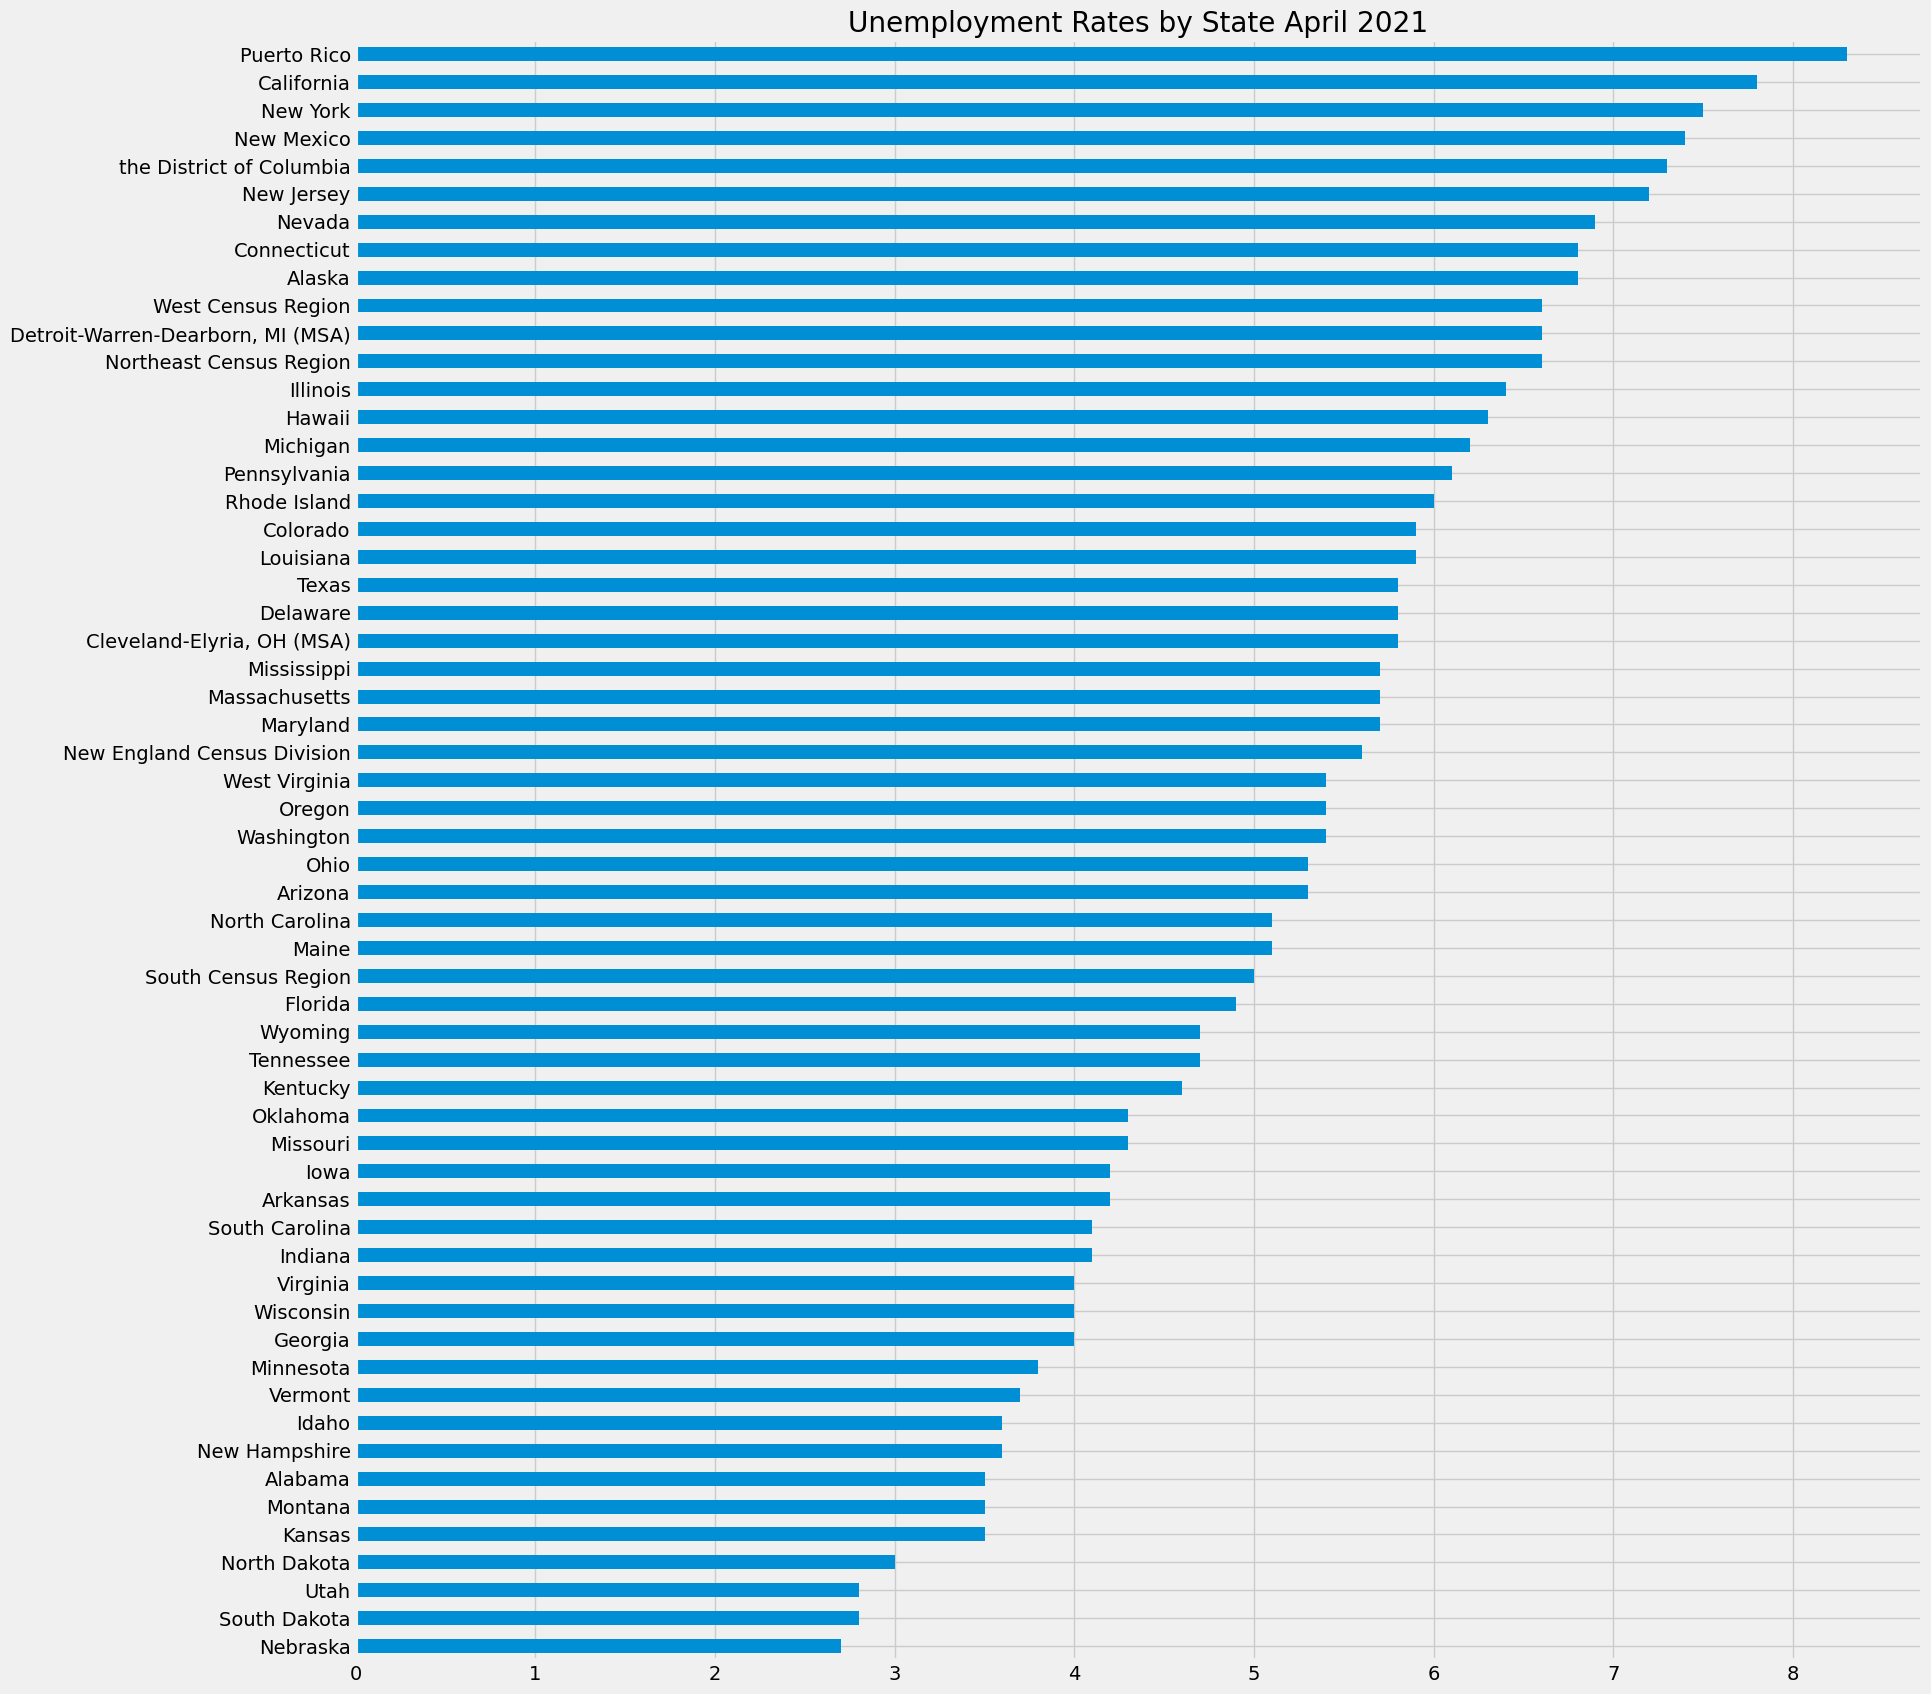

In [ ]:
unemp_states.loc[unemp_states.index == '2021-06-01'].T \
.sort_values('2021-06-01') \
.plot(kind='barh', figsize =(18, 20), color=color_pal[0],
      title='Unemployment Rates by State April 2021', legend=False)

plt.show()

## **Pull Participation Rate**

In [ ]:
part_df = fred.search('Participation Rate - Women' and 'Participation Rate - Men', filter=('frequency', 'Monthly'))
part_df  = part_df .query('seasonal_adjustment ==  "Seasonally Adjusted" and units == "Percent" ')
part_df




,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LNS11300001,LNS11300001,2024-11-24,2024-11-24,Labor Force Participation Rate - Men,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:11-05:00,61,The series comes from the 'Current Population ...
LRAC25MAUSM156S,LRAC25MAUSM156S,2024-11-24,2024-11-24,Infra-Annual Labor Statistics: Labor Force Par...,1955-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-15 13:49:02-06:00,41,OECD Data Filters: REF_AREA: USA MEASURE: LF_...
LNS11300028,LNS11300028,2024-11-24,2024-11-24,Labor Force Participation Rate - 20 Yrs. & ove...,1954-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:20-05:00,31,The series comes from the 'Current Population ...
LNS11300031,LNS11300031,2024-11-24,2024-11-24,Labor Force Participation Rate - 20 Yrs. & ove...,1972-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:21-05:00,27,The series comes from the 'Current Population ...
LNS11300025,LNS11300025,2024-11-24,2024-11-24,Labor Force Participation Rate - 20 Yrs. & ove...,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:33-05:00,9,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRAC64MAAUM156S,LRAC64MAAUM156S,2024-11-24,2024-11-24,Infra-Annual Labor Statistics: Labor Force Par...,1978-02-01,2024-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-15 14:17:06-06:00,0,OECD Data Filters: REF_AREA: AUS MEASURE: LF_...
LRAC24MAJPM156S,LRAC24MAJPM156S,2024-11-24,2024-11-24,Infra-Annual Labor Statistics: Labor Force Par...,1970-01-01,2024-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-15 14:16:07-06:00,0,OECD Data Filters: REF_AREA: JPN MEASURE: LF_...
LRINTTMACLM156S,LRINTTMACLM156S,2024-11-24,2024-11-24,Infra-Annual Labor Statistics: Inactivity Rate...,1986-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-15 14:15:57-06:00,0,OECD Data Filters: REF_AREA: CHL MEASURE: OLF...


In [ ]:
part_df.index

Index(['LNS11300002', 'LNS11300001'], dtype='object', name='series id')

In [ ]:
part_df = fred.search('Participation Rate', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment ==  "Seasonally Adjusted" and units == "Percent" ')

# Filter for Men and Women specifically
part_df = part_df[
    part_df['title'].str.contains('Participation Rate - Women', case=False) |
    part_df['title'].str.contains('Participation Rate - Men', case=False)
]

part_df

all_part_results = []
for myid in part_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name=myid)
  all_part_results.append(results)


part_results = pd.concat(all_part_results, axis=1)
part_results




,LNS11300002,LNS11300001
1948-01-01,32.0,86.7
1948-02-01,32.4,87.0
1948-03-01,32.1,86.3
1948-04-01,33.0,86.6
1948-05-01,32.0,86.1
...,...,...
2024-06-01,57.3,68.1
2024-07-01,57.5,68.2
2024-08-01,57.8,67.9
2024-09-01,57.6,68.1


In [ ]:
# drop rows from year 1929 to 1960

part_results = part_results[(part_results.index.year < 1929) | (part_results.index.year > 1980)]
part_results

,LNS11300002,LNS11300001
1981-01-01,51.9,77.3
1981-02-01,52.0,77.2
1981-03-01,52.1,77.3
1981-04-01,52.3,77.5
1981-05-01,52.4,77.5
...,...,...
2024-06-01,57.3,68.1
2024-07-01,57.5,68.2
2024-08-01,57.8,67.9
2024-09-01,57.6,68.1


### **Visualization of Data**

In [ ]:
#Plot states unemployment rate
fig = px.line(part_results, title='Participation Rates by Gender')

# Rename legend entries
new_names = {'LNS11300002': 'Women', 'LNS11300001': 'Men'} # Replace with actual column names
fig.for_each_trace(lambda t: t.update(name=new_names.get(t.name, t.name)))


# Rename x and y axes
fig.update_layout(xaxis_title="Date", yaxis_title="Participation Rate (%)")

fig.show()